In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("diabetes_dataset.csv")
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [3]:
df.shape

(100000, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [5]:
df.isna().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [6]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


In [7]:
statistik = df.describe()
print(statistik)

                age  alcohol_consumption_per_week  \
count  100000.00000                 100000.000000   
mean       50.12041                      2.003670   
std        15.60460                      1.417779   
min        18.00000                      0.000000   
25%        39.00000                      1.000000   
50%        50.00000                      2.000000   
75%        61.00000                      3.000000   
max        90.00000                     10.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       100000.000000  100000.000000        100000.000000   
mean                           118.911640       5.994787             6.997818   
std                             84.409662       1.780954             1.094622   
min                              0.000000       0.000000             3.000000   
25%                             57.000000       4.800000             6.300000   
50%                            100.0

In [8]:
print("Shape:", df.shape)

Shape: (100000, 31)


In [9]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_

In [10]:
df["diagnosed_diabetes"].value_counts(normalize=True)

diagnosed_diabetes
1    0.59998
0    0.40002
Name: proportion, dtype: float64

In [11]:
missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values per column:")
print(missing)


Missing values per column:
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fast

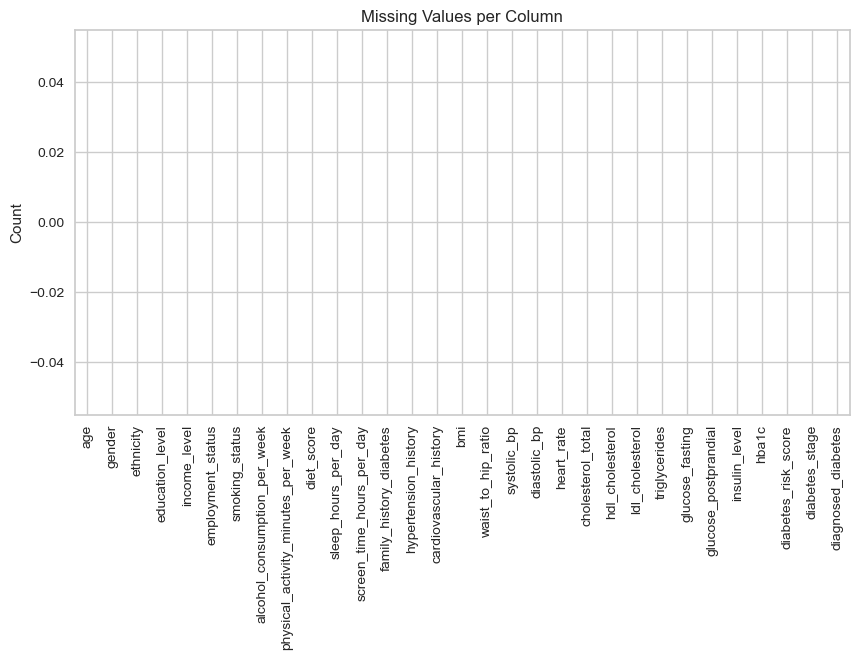

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
missing.plot(kind='bar')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.show()

In [13]:
print("\nNumeric Summary:")
display(df.describe())


Numeric Summary:


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


In [14]:
# Categorical summary

cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Columns:", list(cat_cols))

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False).head(10))


Categorical Columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']

Value counts for gender:
gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

Value counts for ethnicity:
ethnicity
White       44997
Hispanic    20103
Black       17986
Asian       11865
Other        5049
Name: count, dtype: int64

Value counts for education_level:
education_level
Highschool      44891
Graduate        35037
Postgraduate    14972
No formal        5100
Name: count, dtype: int64

Value counts for income_level:
income_level
Middle          35152
Lower-Middle    25150
Upper-Middle    19866
Low             14830
High             5002
Name: count, dtype: int64

Value counts for employment_status:
employment_status
Employed      60175
Retired       21761
Unemployed    11918
Student        6146
Name: count, dtype: int64

Value counts for smoking_status:
smoking_status
Never      59813
Current    20176
Former    


Possible target column(s): ['family_history_diabetes', 'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes']


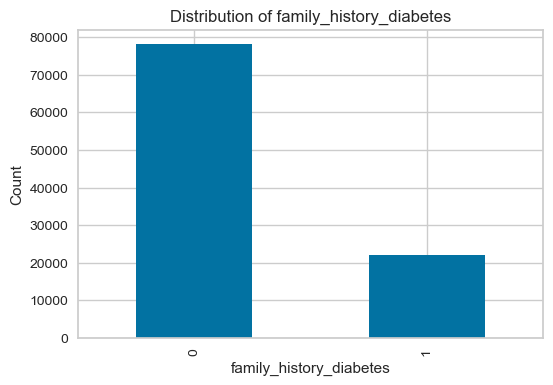

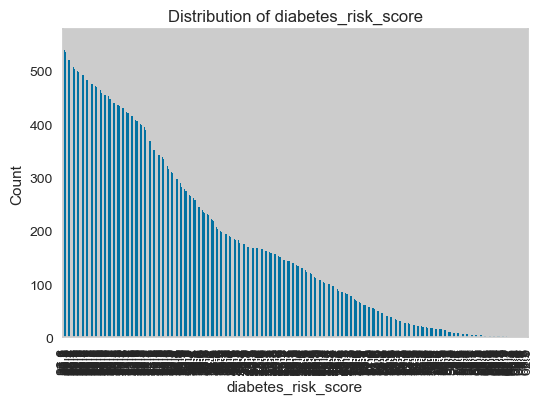

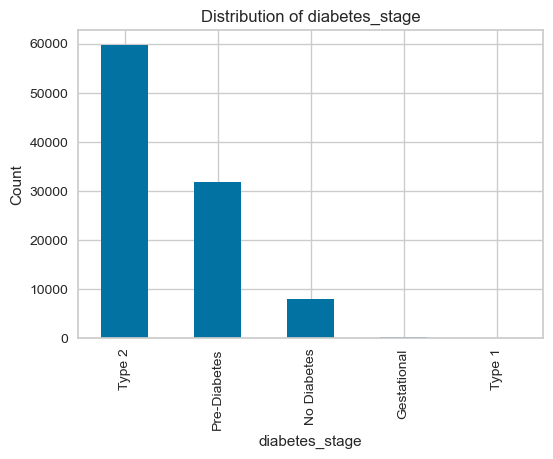

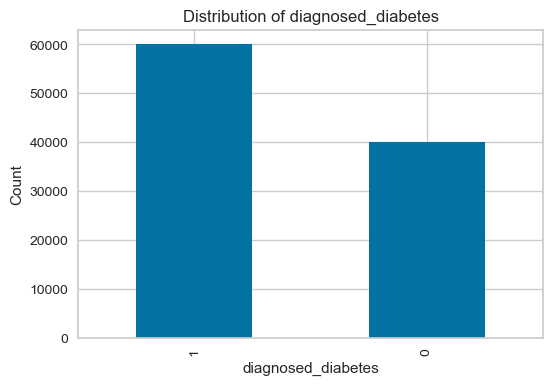

In [15]:
# Detect columns containing 'diabet'

target_candidates = [c for c in df.columns if 'diabet' in c.lower()]
print("\nPossible target column(s):", target_candidates)

for col in target_candidates:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

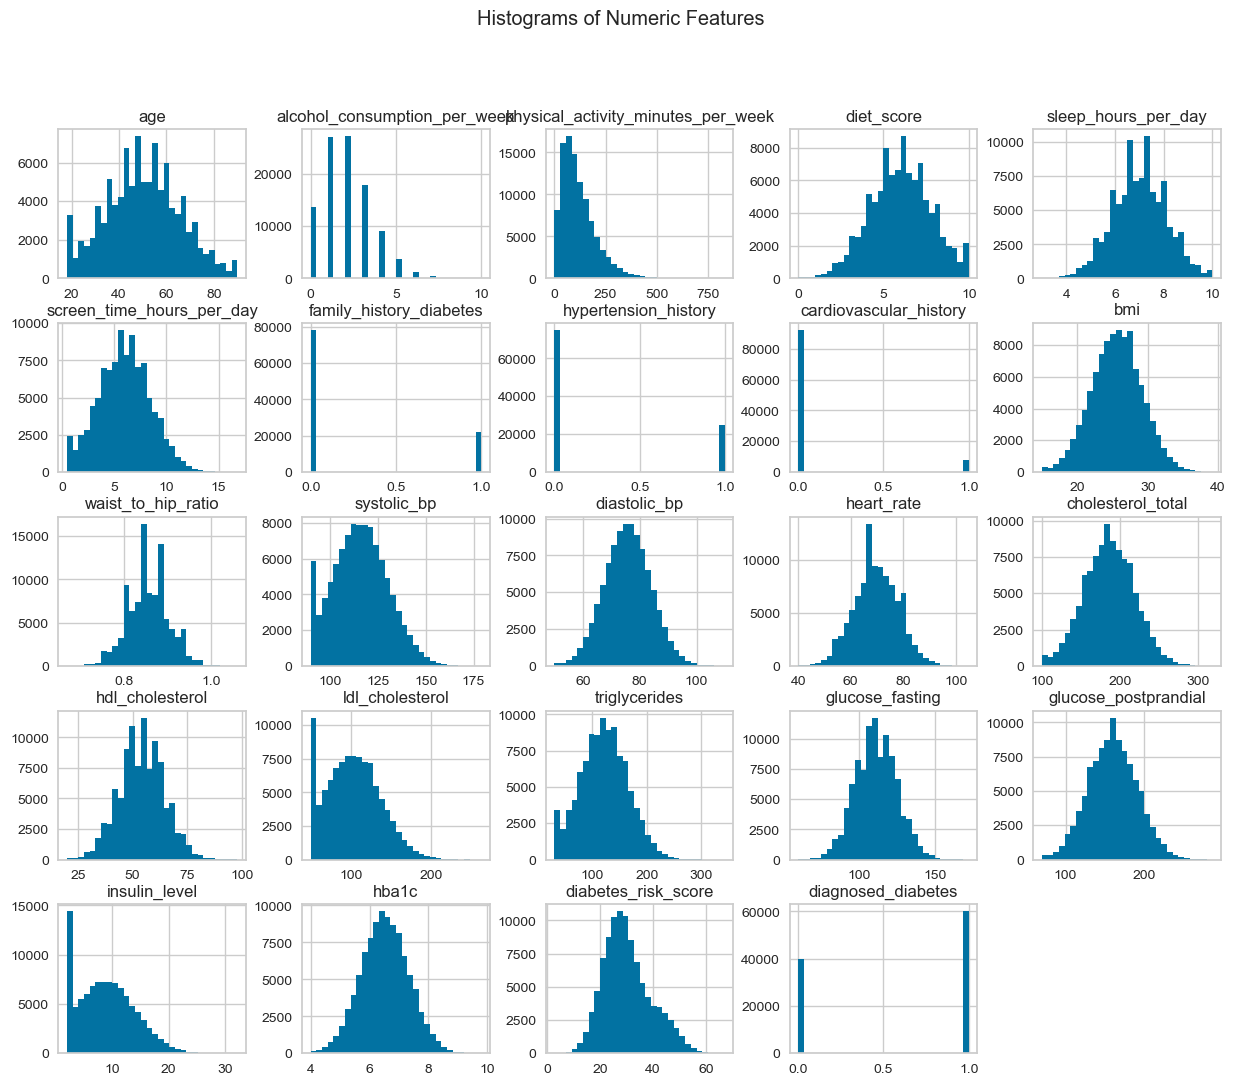

In [16]:
# Histograms for numeric columns

import numpy as np
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Histograms of Numeric Features")
plt.show()

<Figure size 1400x600 with 0 Axes>

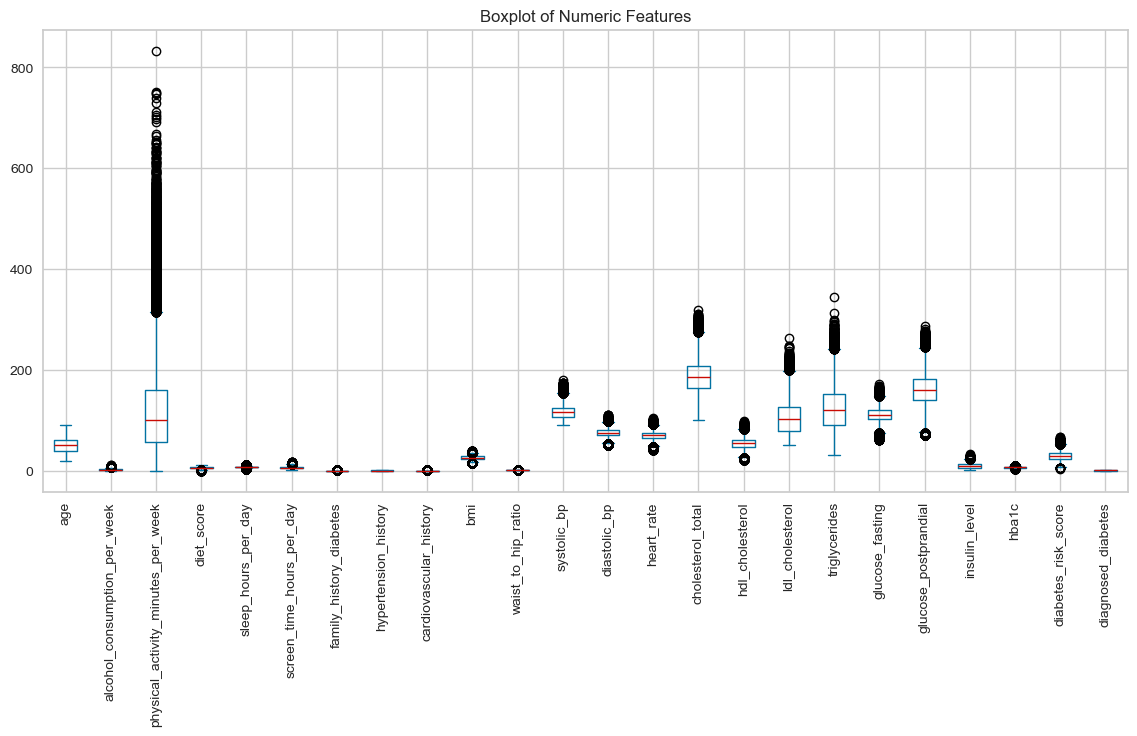

In [17]:
# Boxplots for numeric columns

plt.figure(figsize=(14,6))
df[num_cols].plot(kind="box", subplots=False, figsize=(14,6))
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=90)
plt.show()

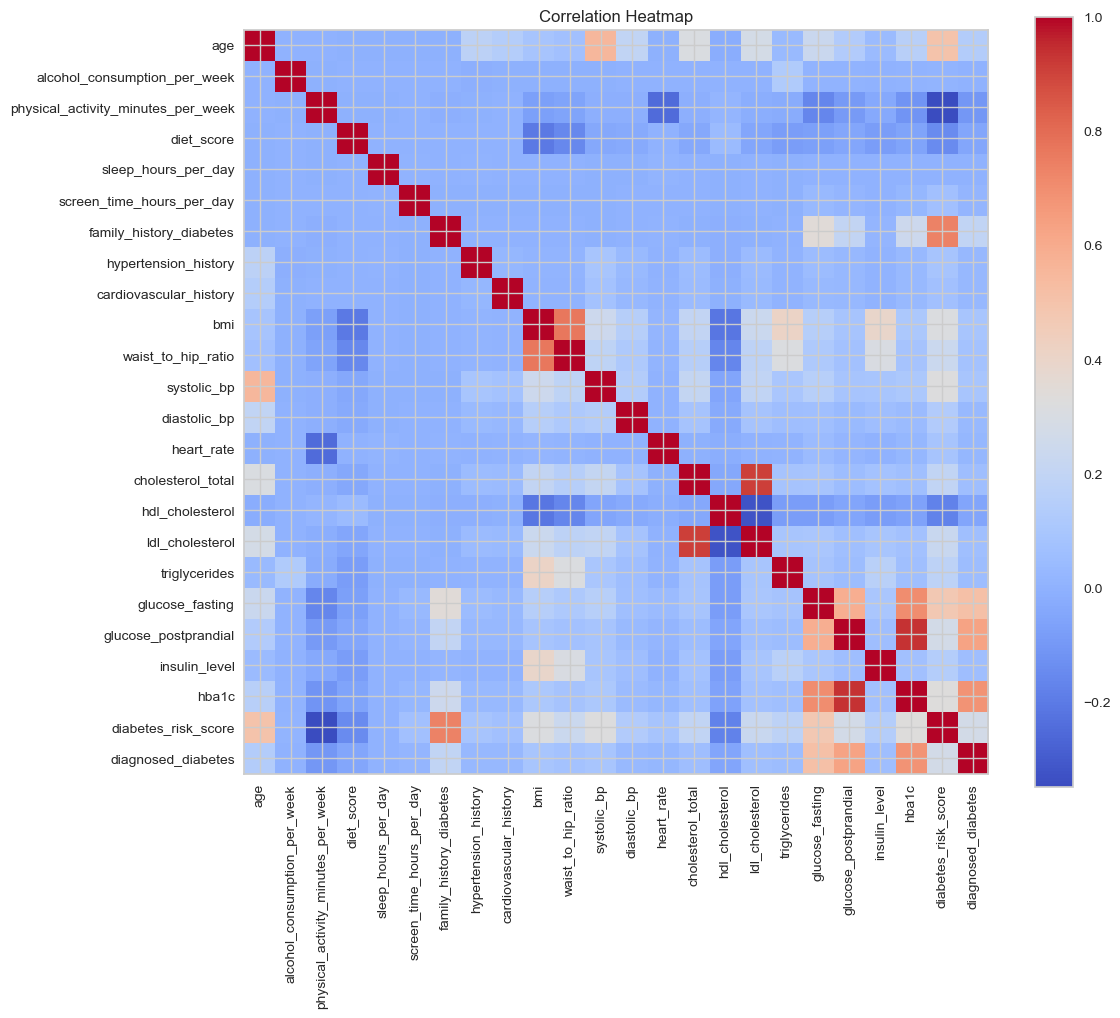

In [18]:
# Correlation heatmap

plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
from scipy.stats import chi2_contingency

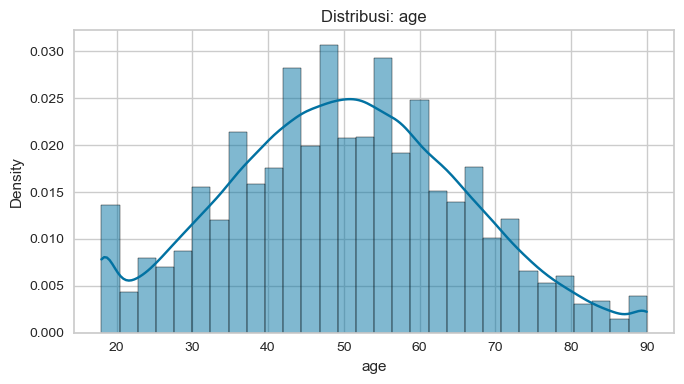

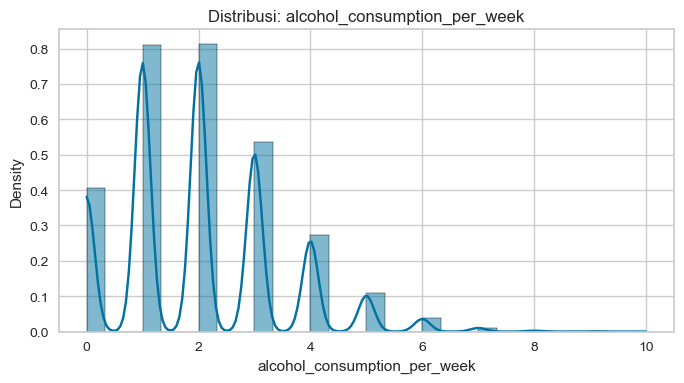

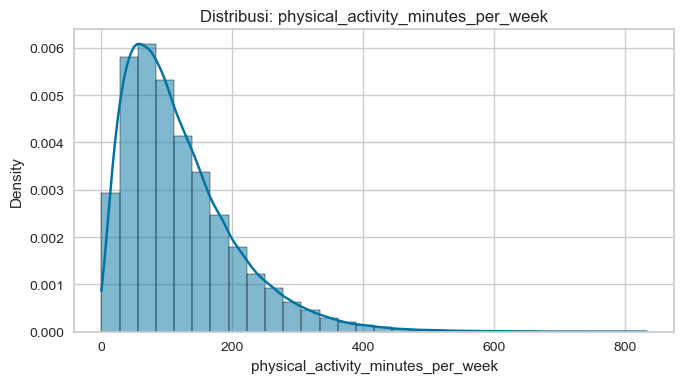

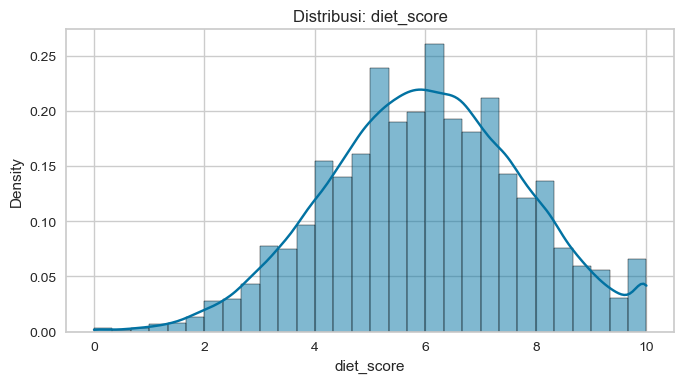

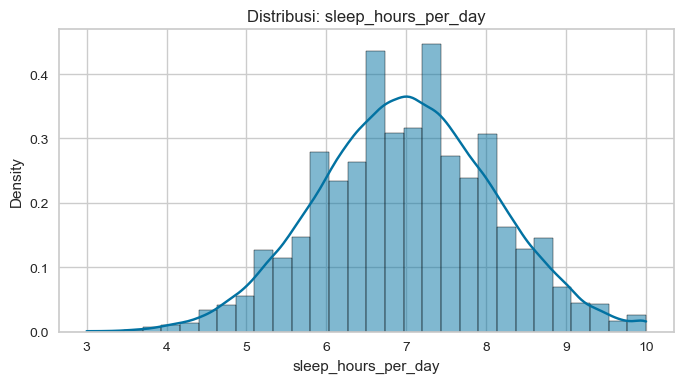

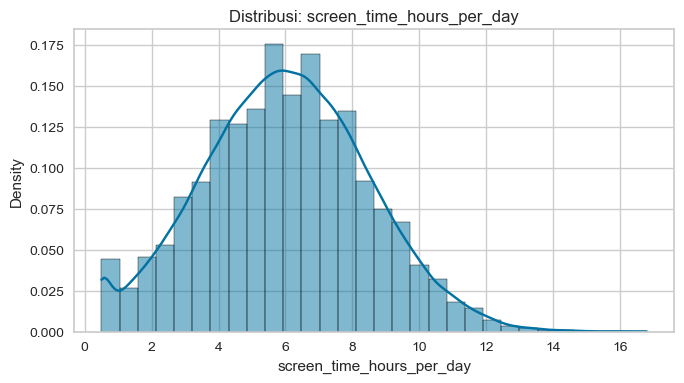

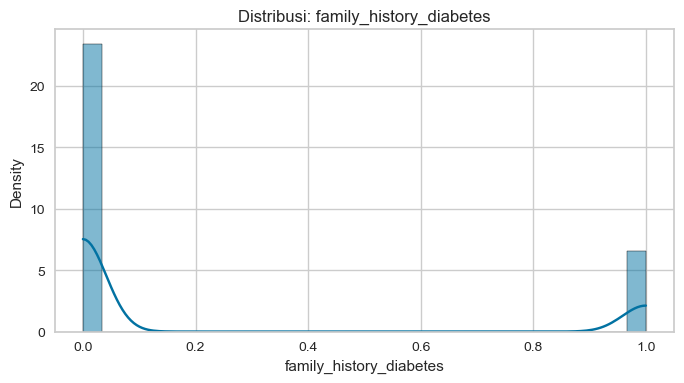

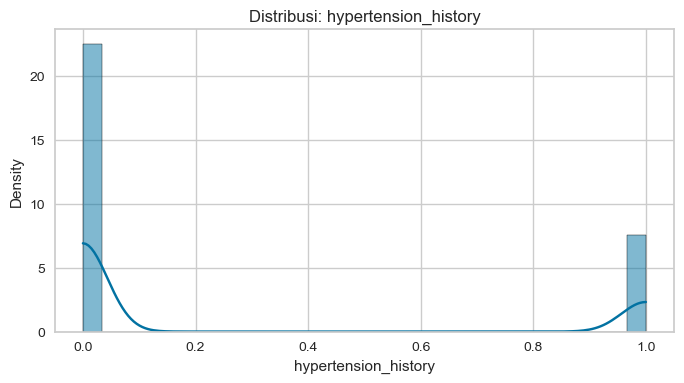

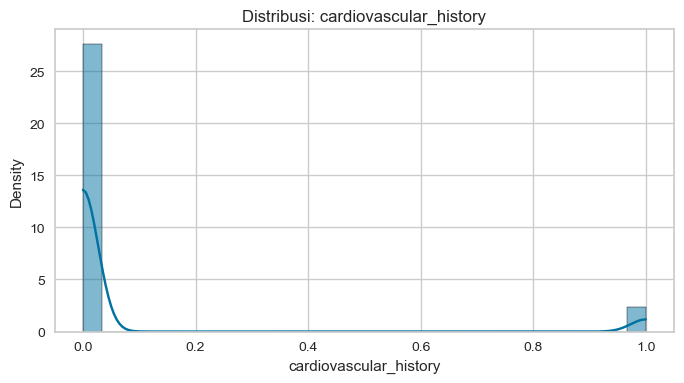

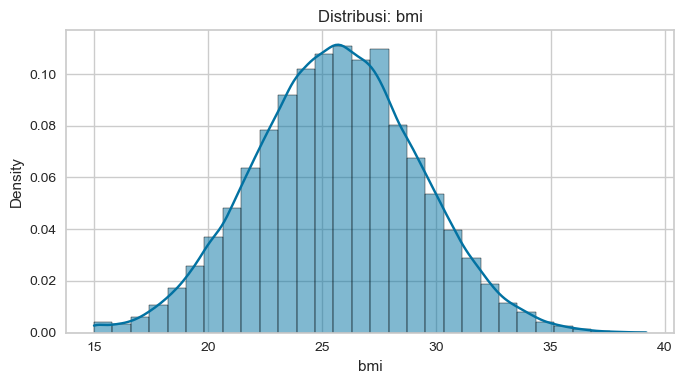

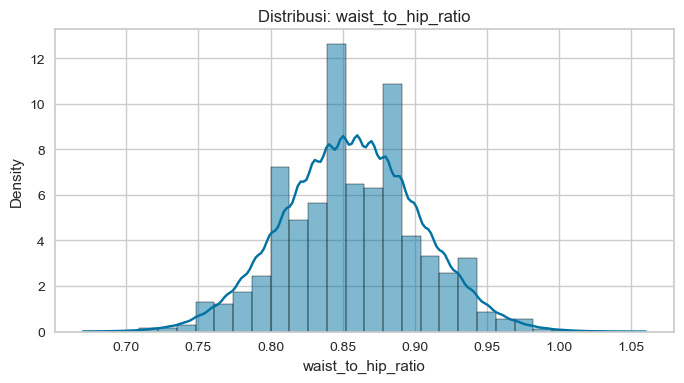

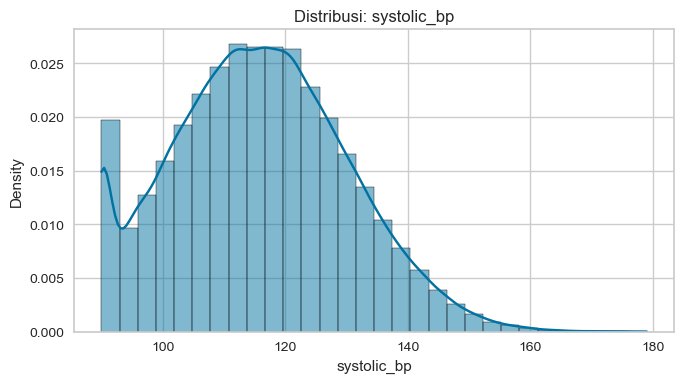

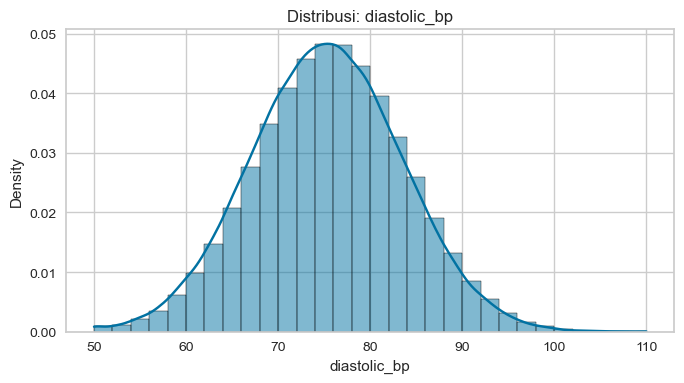

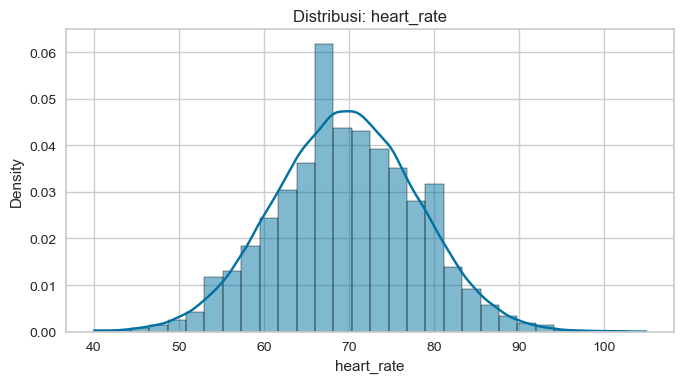

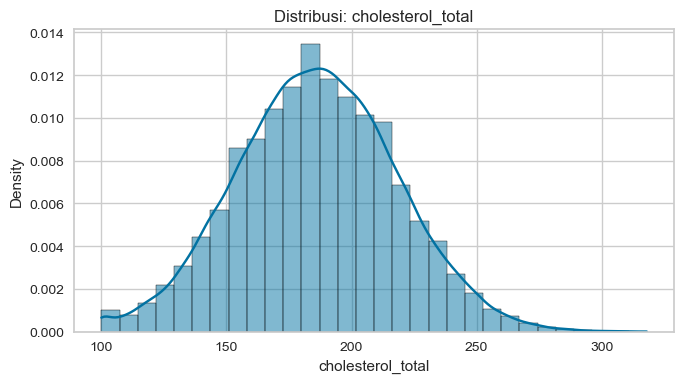

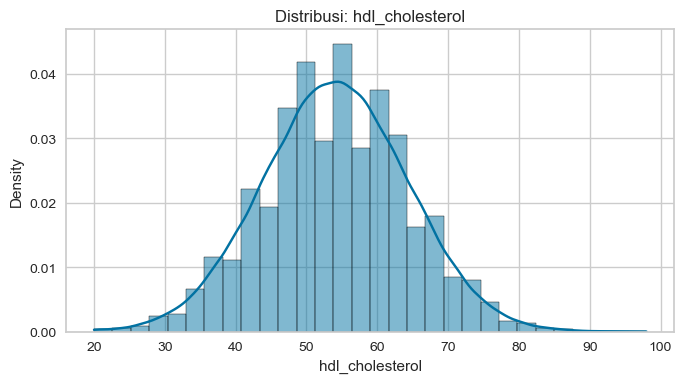

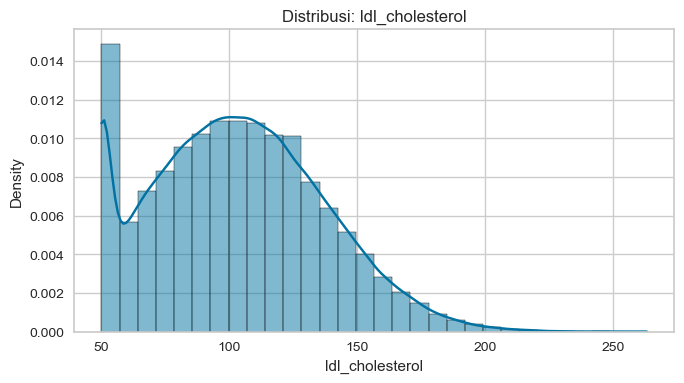

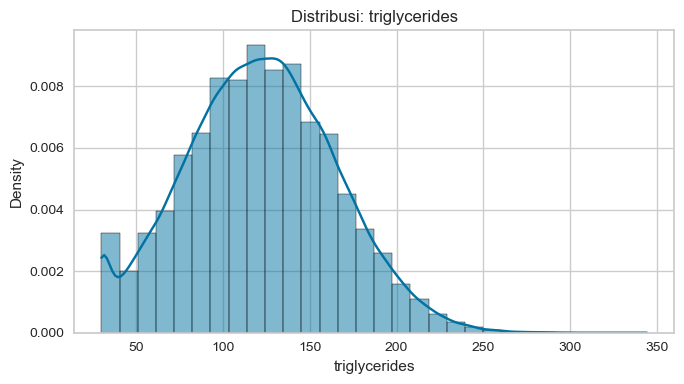

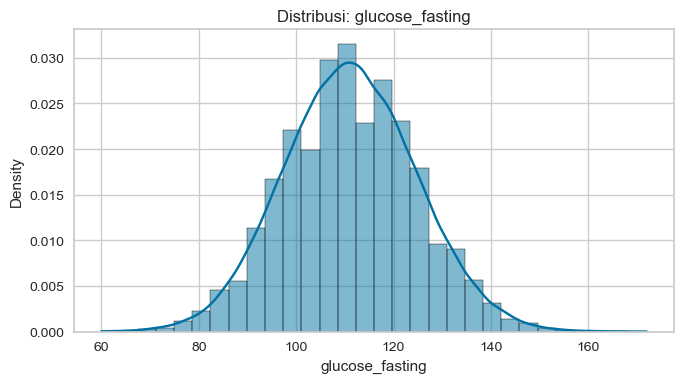

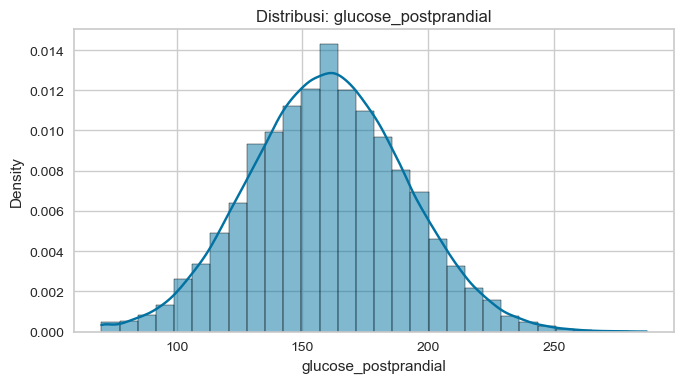

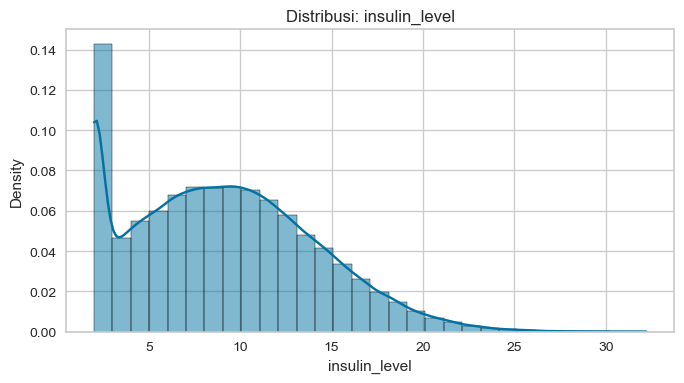

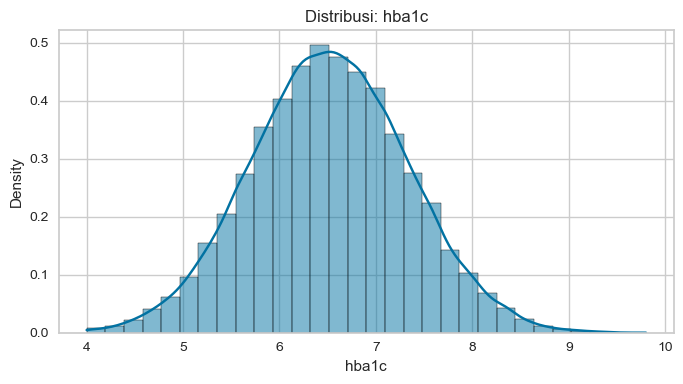

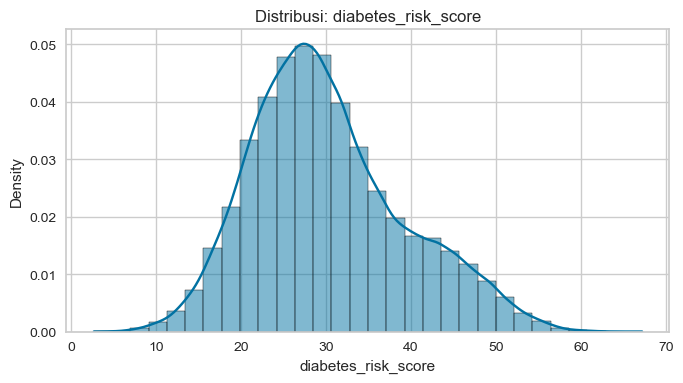

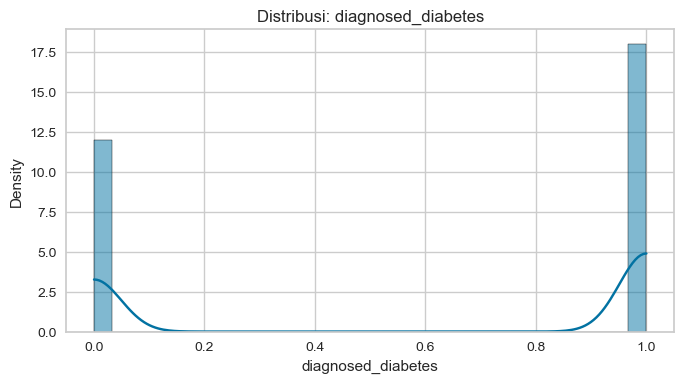

In [20]:
# identifikasi kolom numerik
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
len(num_cols), num_cols

for col in num_cols:
    fig, ax = plt.subplots(figsize=(7,4))
    sns.histplot(df[col].dropna(), kde=True, stat="density", bins=30)
    ax.set_title(f"Distribusi: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    plt.tight_layout()
    plt.show()

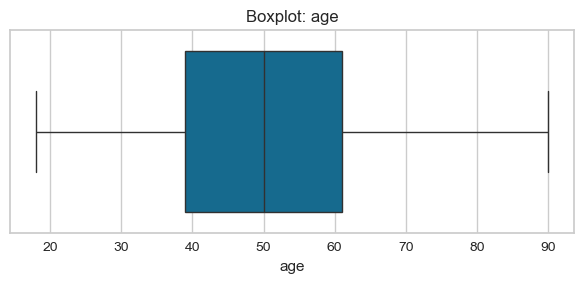

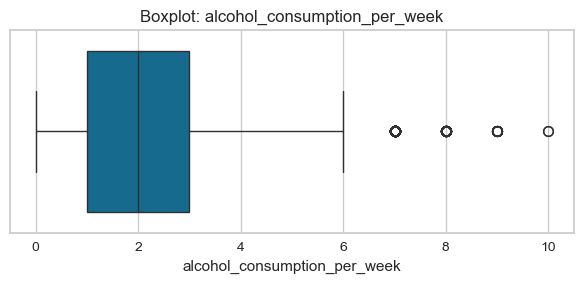

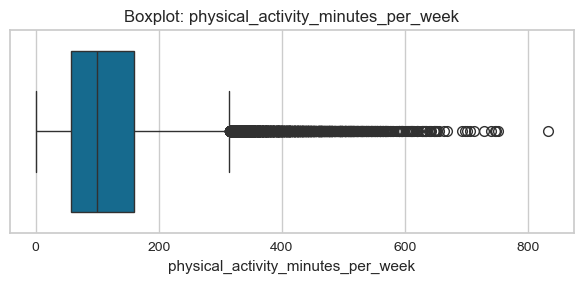

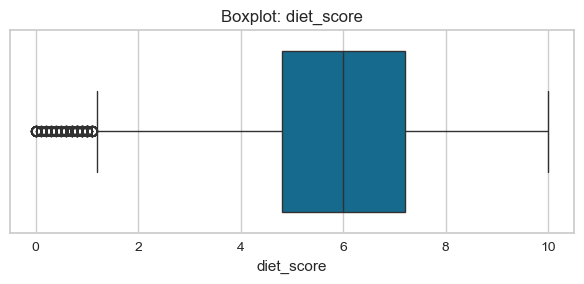

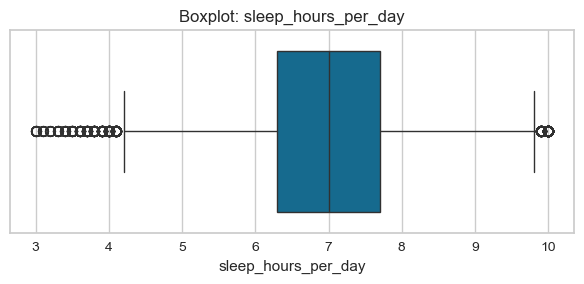

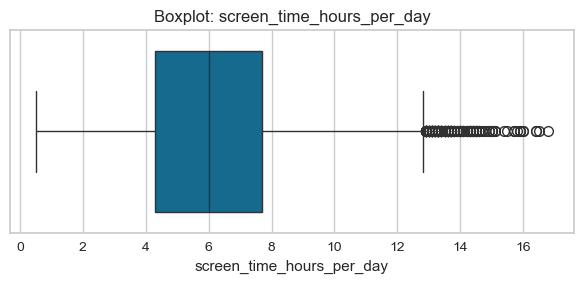

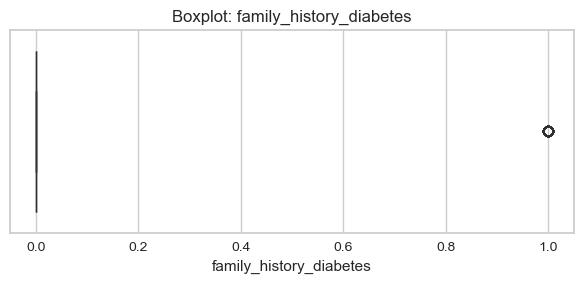

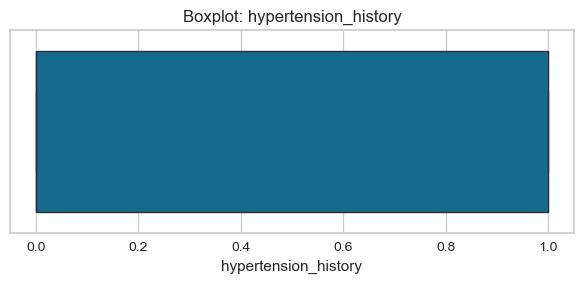

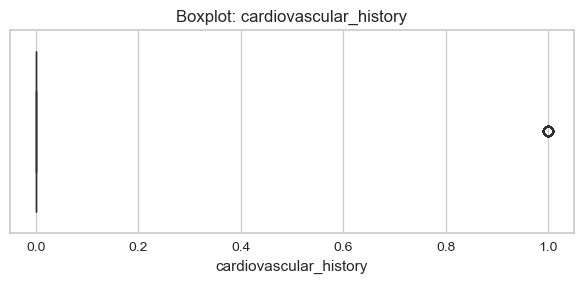

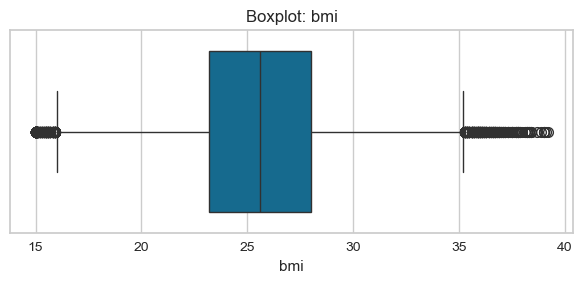

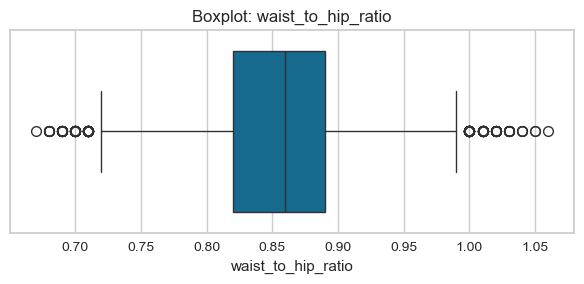

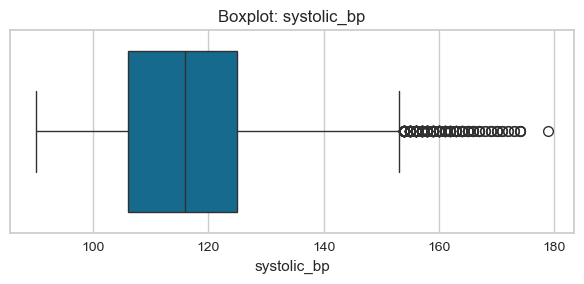

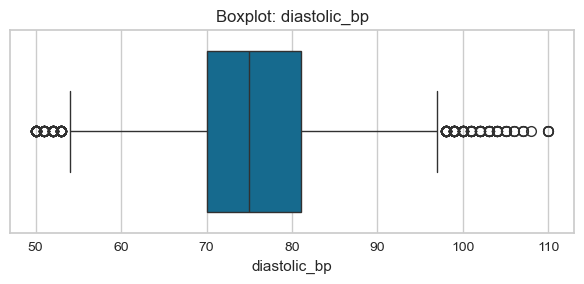

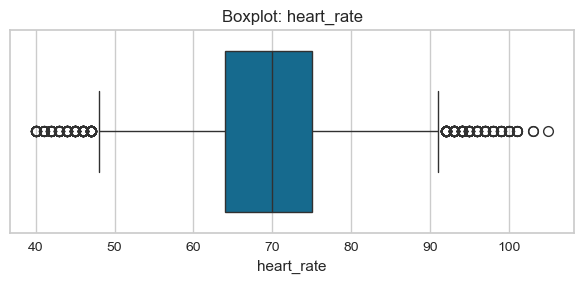

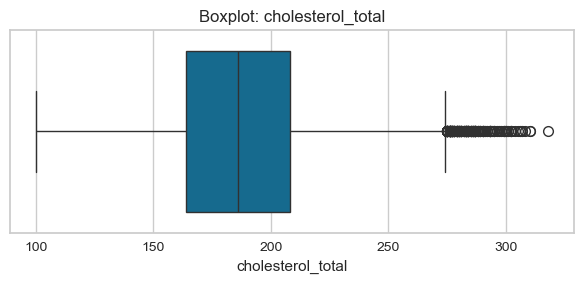

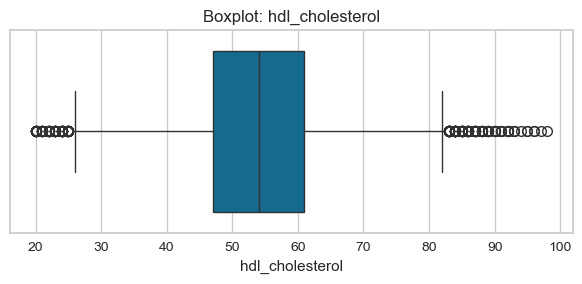

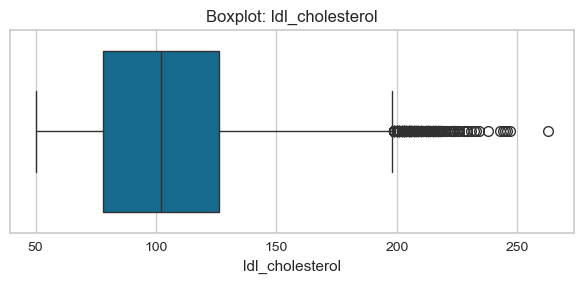

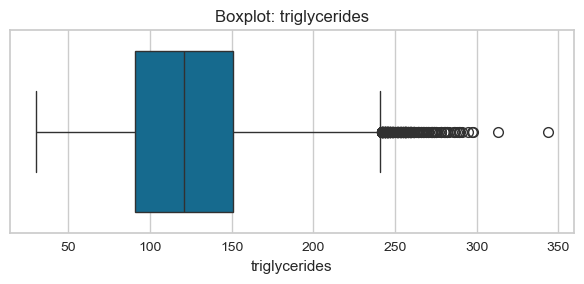

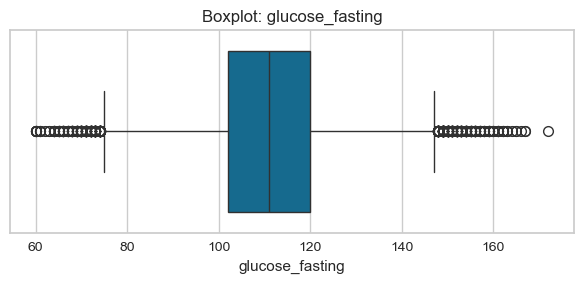

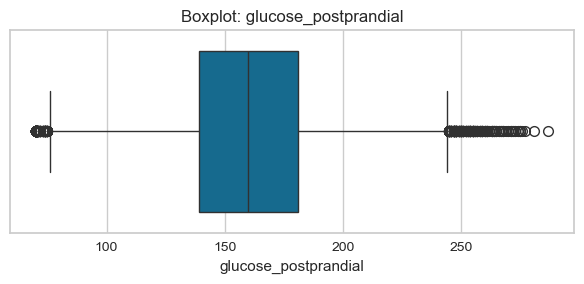

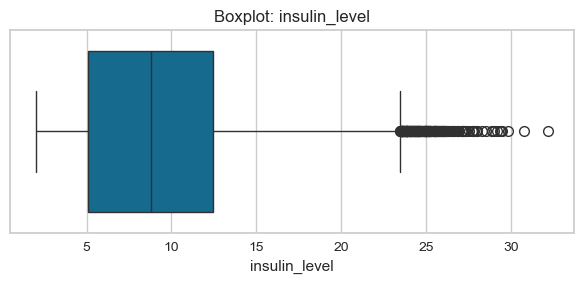

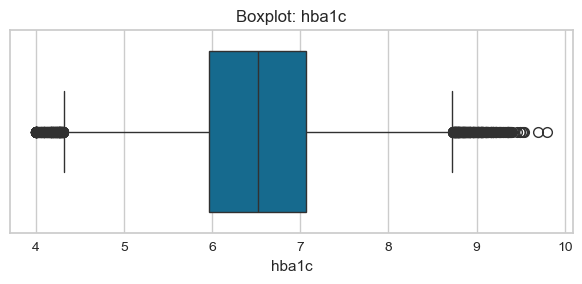

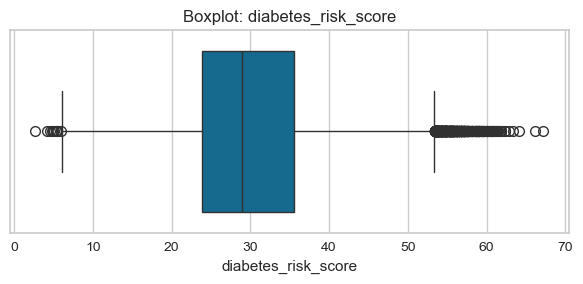

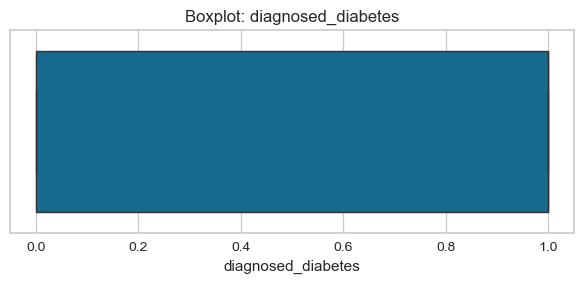

In [21]:
# boxplot untuk masing-masing numeric
for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,3))
    sns.boxplot(x=df[col].dropna(), ax=ax)
    ax.set_title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

In [22]:
# hitung outlier IQR per kolom

outlier_summary = {}
for col in num_cols:
    s = df[col].dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    n_out = ((s < lower) | (s > upper)).sum()
    outlier_summary[col] = {"Q1":Q1, "Q3":Q3, "IQR":IQR, "lower":lower, "upper":upper, "n_outliers": int(n_out)}
pd.DataFrame(outlier_summary).T

,Q1,Q3,IQR,lower,upper,n_outliers
age,39.00,61.00,22.00,6.000,94.000,0.0
alcohol_consumption_per_week,1.00,3.00,2.00,-2.000,6.000,458.0
physical_activity_minutes_per_week,57.00,160.00,103.00,-97.500,314.500,3199.0
diet_score,4.80,7.20,2.40,1.200,10.800,337.0
sleep_hours_per_day,6.30,7.70,1.40,4.200,9.800,900.0
screen_time_hours_per_day,4.30,7.70,3.40,-0.800,12.800,305.0
family_history_diabetes,0.00,0.00,0.00,0.000,0.000,21941.0
hypertension_history,0.00,1.00,1.00,-1.500,2.500,0.0
cardiovascular_history,0.00,0.00,0.00,0.000,0.000,7920.0
bmi,23.20,28.00,4.80,16.000,35.200,744.0


#### A. Visualisasi Faktor Perilaku dan Gaya Hidup

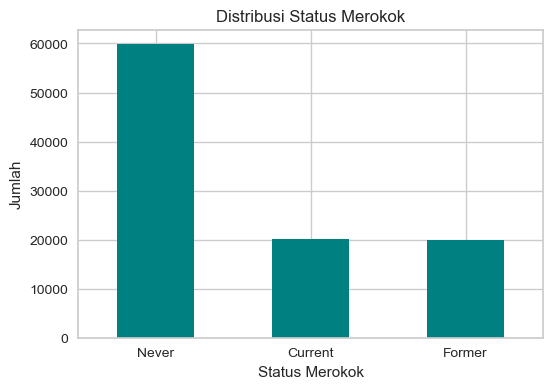

In [23]:
# Distribusi Status Merokok

plt.figure(figsize=(6,4))
df["smoking_status"].value_counts().plot(kind="bar", color="teal")
plt.title("Distribusi Status Merokok")
plt.xlabel("Status Merokok")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.show()


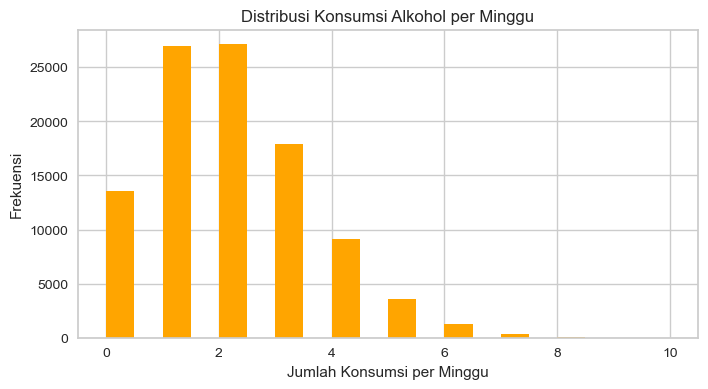

In [24]:
# Distribusi Konsumsi Alkohol per Minggu

plt.figure(figsize=(8,4))
plt.hist(df["alcohol_consumption_per_week"], bins=20, color="orange")
plt.title("Distribusi Konsumsi Alkohol per Minggu")
plt.xlabel("Jumlah Konsumsi per Minggu")
plt.ylabel("Frekuensi")
plt.show()


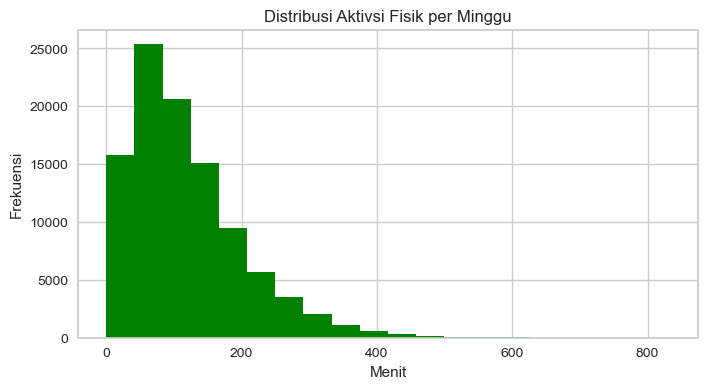

In [25]:
# Distribusi Aktivitas Fisik per Minggu

plt.figure(figsize=(8,4))
plt.hist(df["physical_activity_minutes_per_week"], bins=20, color="green")
plt.title("Distribusi Aktivsi Fisik per Minggu")
plt.xlabel("Menit")
plt.ylabel("Frekuensi")
plt.show()


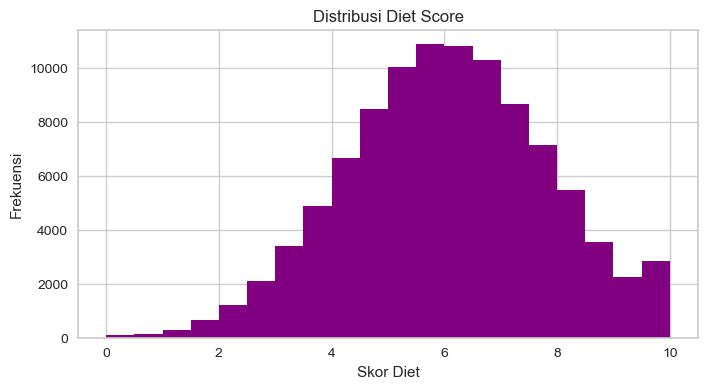

In [26]:
# Distribusi Pola Makan (Diet Score)

plt.figure(figsize=(8,4))
plt.hist(df["diet_score"], bins=20, color="purple")
plt.title("Distribusi Diet Score")
plt.xlabel("Skor Diet")
plt.ylabel("Frekuensi")
plt.show()


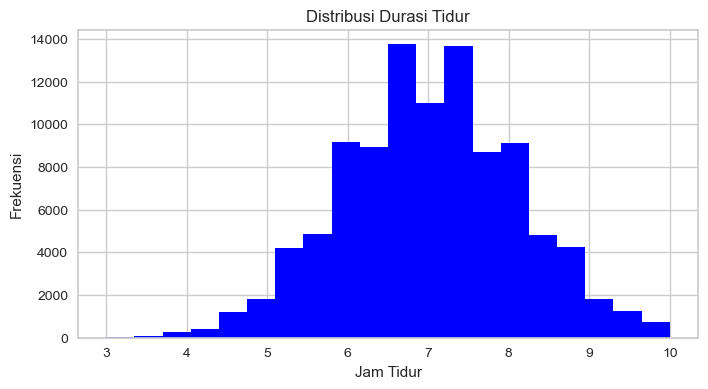

In [27]:
# Distribusi Durasi Tidur per Hari

plt.figure(figsize=(8,4))
plt.hist(df["sleep_hours_per_day"], bins=20, color="blue")
plt.title("Distribusi Durasi Tidur")
plt.xlabel("Jam Tidur")
plt.ylabel("Frekuensi")
plt.show()


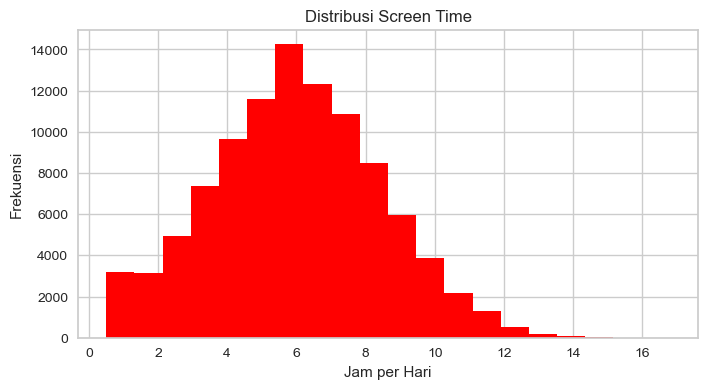

In [28]:
# Distribusi Screen Time per Hari

plt.figure(figsize=(8,4))
plt.hist(df["screen_time_hours_per_day"], bins=20, color="red")
plt.title("Distribusi Screen Time")
plt.xlabel("Jam per Hari")
plt.ylabel("Frekuensi")
plt.show()


#### Visualisasi Indikator Klinis

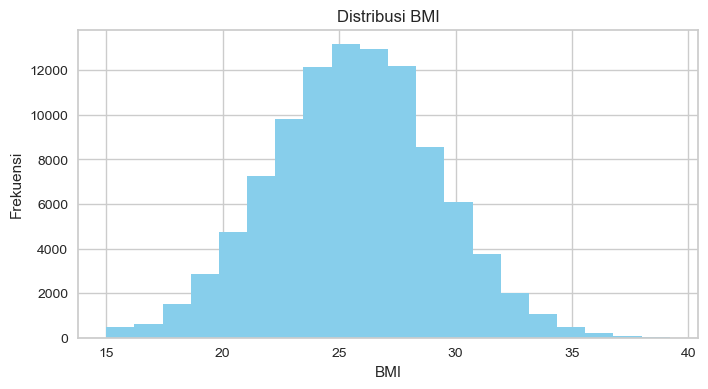

In [29]:
# Distribusi BMI

plt.figure(figsize=(8,4))
plt.hist(df["bmi"], bins=20, color="skyblue")
plt.title("Distribusi BMI")
plt.xlabel("BMI")
plt.ylabel("Frekuensi")
plt.show()


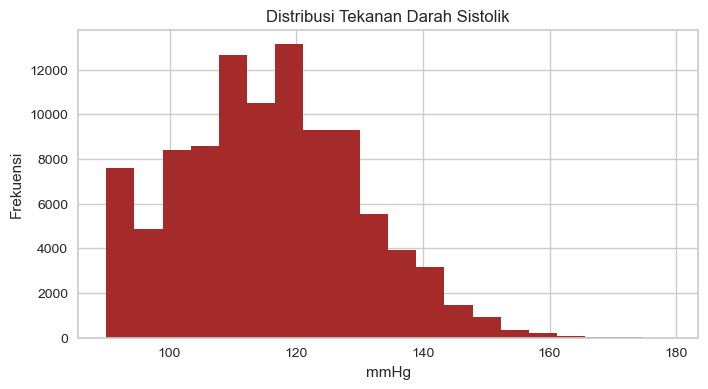

In [30]:
# Distribusi Tekanan Darah (Sistolik)

plt.figure(figsize=(8,4))
plt.hist(df["systolic_bp"], bins=20, color="brown")
plt.title("Distribusi Tekanan Darah Sistolik")
plt.xlabel("mmHg")
plt.ylabel("Frekuensi")
plt.show()


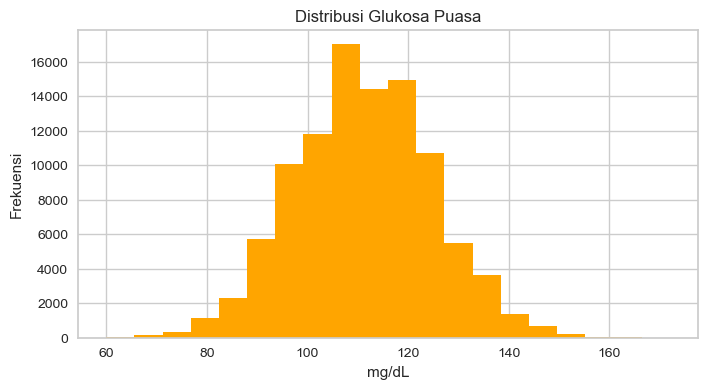

In [31]:
# Distribusi Glukosa Puasa (Fasting Glucose)

plt.figure(figsize=(8,4))
plt.hist(df["glucose_fasting"], bins=20, color="orange")
plt.title("Distribusi Glukosa Puasa")
plt.xlabel("mg/dL")
plt.ylabel("Frekuensi")
plt.show()


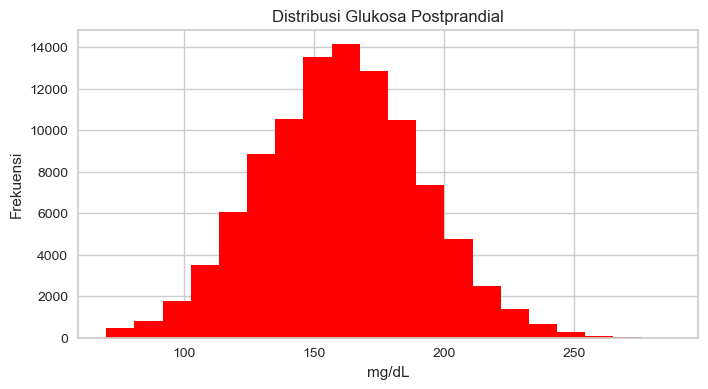

In [32]:
# Distribusi Glukosa Postprandial

plt.figure(figsize=(8,4))
plt.hist(df["glucose_postprandial"], bins=20, color="red")
plt.title("Distribusi Glukosa Postprandial")
plt.xlabel("mg/dL")
plt.ylabel("Frekuensi")
plt.show()


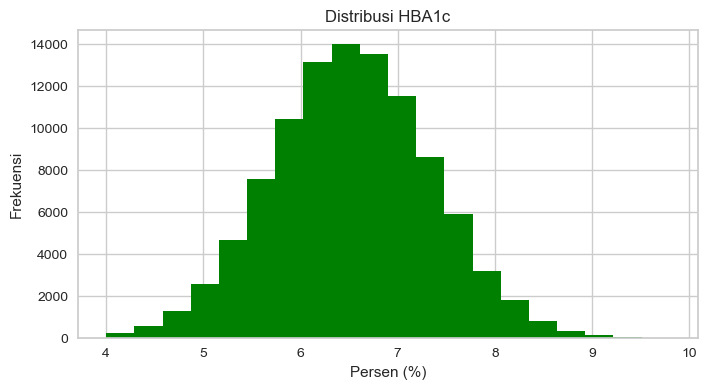

In [33]:
# Distribusi HBA1c

plt.figure(figsize=(8,4))
plt.hist(df["hba1c"], bins=20, color="green")
plt.title("Distribusi HBA1c")
plt.xlabel("Persen (%)")
plt.ylabel("Frekuensi")
plt.show()

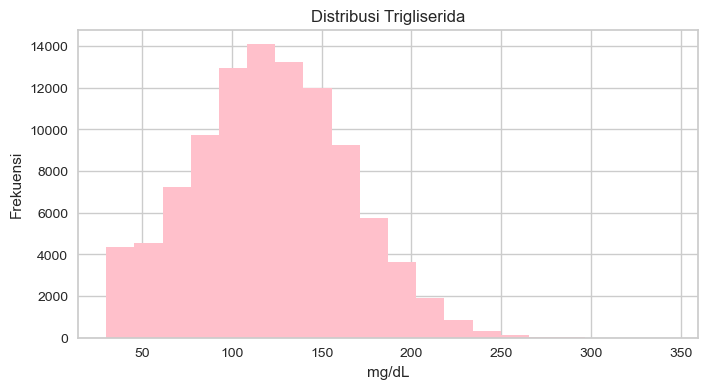

In [34]:
# Distribusi Trigliserida

plt.figure(figsize=(8,4))
plt.hist(df["triglycerides"], bins=20, color="pink")
plt.title("Distribusi Trigliserida")
plt.xlabel("mg/dL")
plt.ylabel("Frekuensi")
plt.show()


#### Visualisasi Variabel Target Diabetes

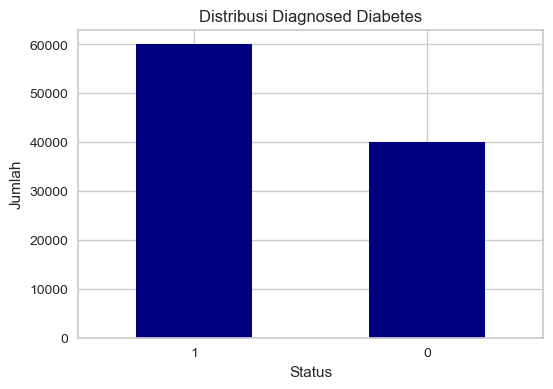

In [35]:
# Distribusi Diagnosed Diabetes
# 0 = no diabets
# 1 = diabets

plt.figure(figsize=(6,4))
df["diagnosed_diabetes"].value_counts().plot(kind="bar", color="navy")
plt.title("Distribusi Diagnosed Diabetes")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.show()

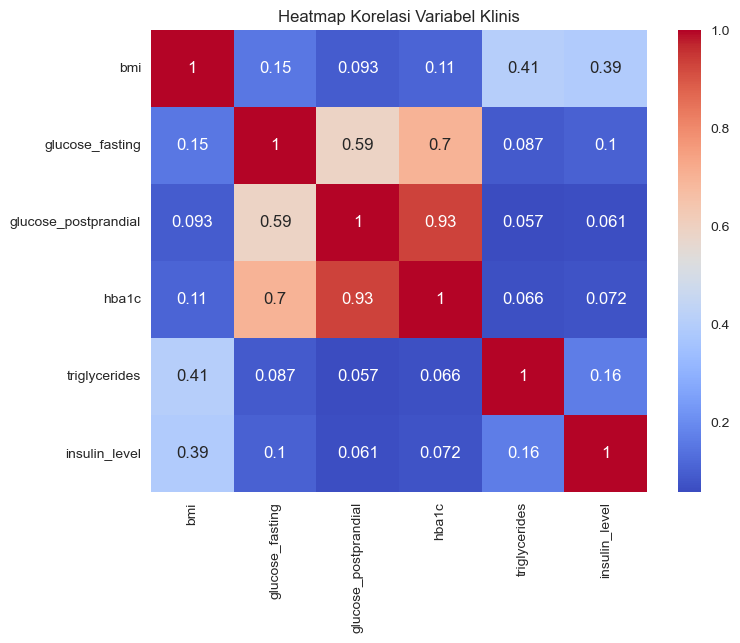

In [36]:
# Korelasi Variabel Klinis

import seaborn as sns
import matplotlib.pyplot as plt

clinical_cols = ["bmi","glucose_fasting","glucose_postprandial","hba1c","triglycerides","insulin_level"]

plt.figure(figsize=(8,6))
sns.heatmap(df[clinical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Variabel Klinis")
plt.show()

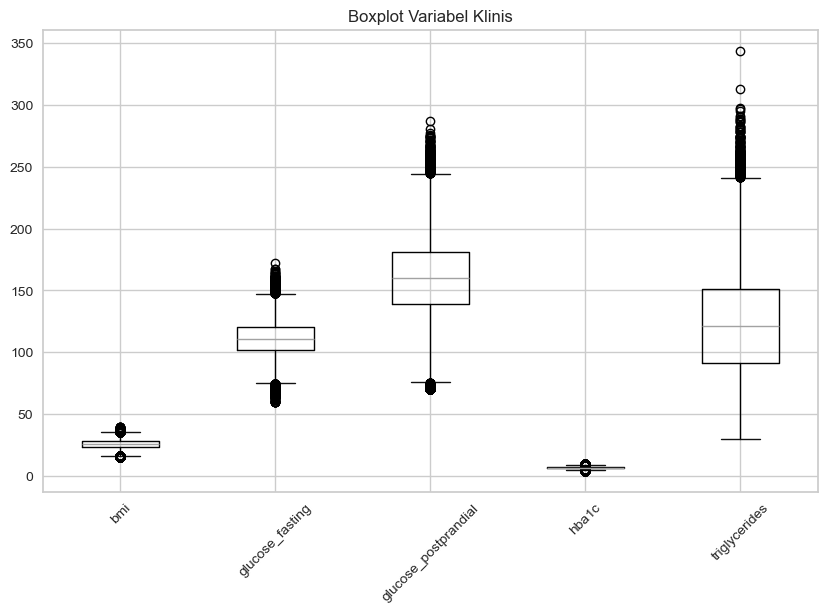

In [37]:
# Boxplot Indikator Klinis (Deteksi Outlier)

clinical_cols = ["bmi","glucose_fasting","glucose_postprandial","hba1c","triglycerides"]

plt.figure(figsize=(10,6))
df[clinical_cols].boxplot()
plt.title("Boxplot Variabel Klinis")
plt.xticks(rotation=45)
plt.show()

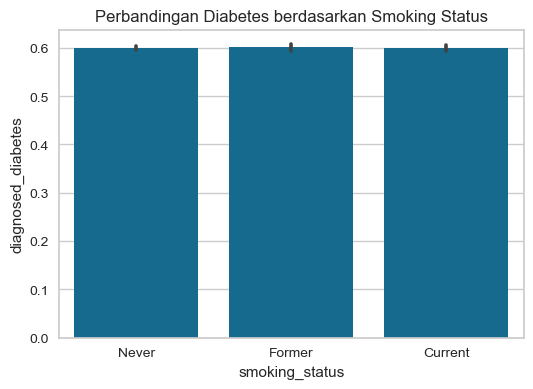

In [38]:
# Hubungan Awal antara Faktor Perilaku dan Diabetes
# Smoking vs Diabetes

import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x="smoking_status", y="diagnosed_diabetes", data=df)
plt.title("Perbandingan Diabetes berdasarkan Smoking Status")
plt.show()

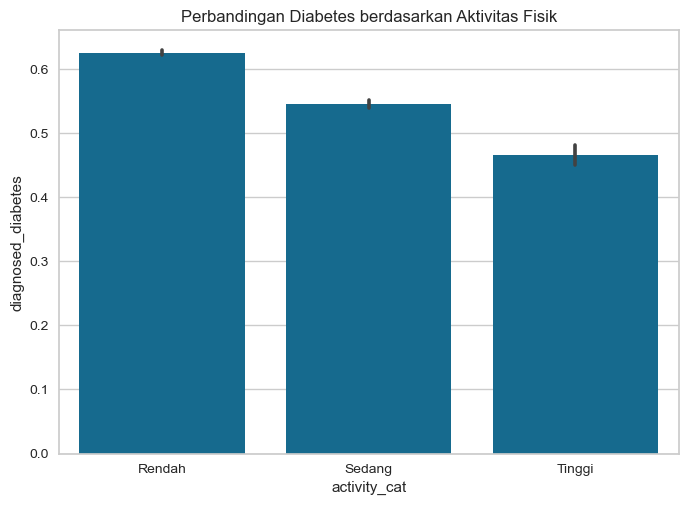

In [39]:
# Aktivitas fisik vs Diabetes
df["activity_cat"] = pd.cut(df["physical_activity_minutes_per_week"],
                           bins=[0,150,300,10000],
                           labels=["Rendah","Sedang","Tinggi"])

sns.barplot(x="activity_cat", y="diagnosed_diabetes", data=df)
plt.title("Perbandingan Diabetes berdasarkan Aktivitas Fisik")
plt.show()

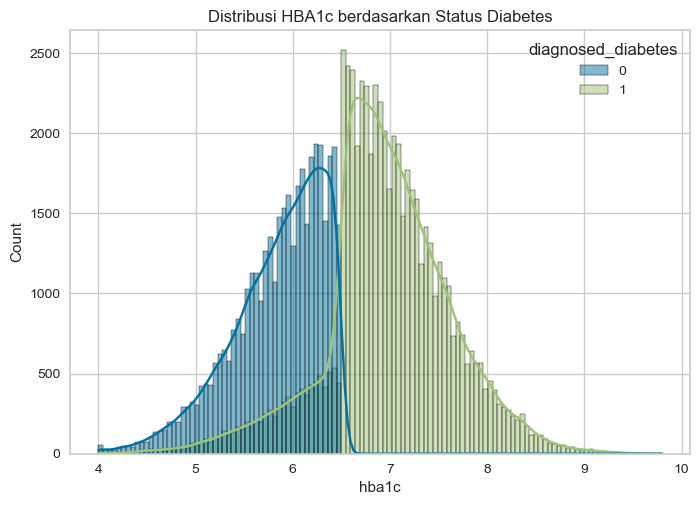

In [40]:
# Hubungan Awal antara Faktor Klinis dan Diabetes

sns.histplot(data=df, x="hba1c", hue="diagnosed_diabetes", kde=True)
plt.title("Distribusi HBA1c berdasarkan Status Diabetes")
plt.show()

### Data Preparation

#### Data Cleansing

In [41]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values:
 age                                    0
gender                                 0
ethnicity                              0
education_level                        0
income_level                           0
employment_status                      0
smoking_status                         0
alcohol_consumption_per_week           0
physical_activity_minutes_per_week     0
diet_score                             0
sleep_hours_per_day                    0
screen_time_hours_per_day              0
family_history_diabetes                0
hypertension_history                   0
cardiovascular_history                 0
bmi                                    0
waist_to_hip_ratio                     0
systolic_bp                            0
diastolic_bp                           0
heart_rate                             0
cholesterol_total                      0
hdl_cholesterol                        0
ldl_cholesterol                        0
triglycerides                          0

In [42]:
# Standarisasi kategorikal kolom
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

for col in cat_cols:
    df[col] = df[col].fillna("").astype(str).str.strip().str.title()

Categorical columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']


In [43]:
# hapus duplikasi
n_dup_before = df.duplicated().sum()
if n_dup_before > 0:
    df = df.drop_duplicates().reset_index(drop=True)
n_dup_after = df.duplicated().sum()
print(f"Duplicates found: {n_dup_before} -> after drop: {n_dup_after}")

Duplicates found: 0 -> after drop: 0


In [44]:
# deteksi outlier per-kolom (iqr method)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", num_cols)

outlier_summary = {}
bounds = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    bounds[col] = (lower, upper)
    outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_summary[col] = outlier_count

df["has_outlier"] = False

mask_any_outlier = np.zeros(len(df), dtype=bool)
for col, (lower, upper) in bounds.items():
    mask = (df[col] < lower) | (df[col] > upper)
    mask_any_outlier = mask_any_outlier | mask

df.loc[mask_any_outlier, "has_outlier"] = True

Numeric columns: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diagnosed_diabetes']


In [45]:
print("\n=== Cleansing Summary ===")
print(f"Rows after dedupe: {df.shape[0]}")
print("Number of rows flagged with has_outlier = True:", df["has_outlier"].sum())
print("\nOutlier counts per numeric column (showing up to first 30 cols):")
for i, (col, cnt) in enumerate(outlier_summary.items()):
    if i < 30:
        print(f" - {col}: {cnt}")
    else:
        break

print("\nContoh baris yang punya outlier (5 rows):")
print(df[df["has_outlier"]].head())


=== Cleansing Summary ===
Rows after dedupe: 100000
Number of rows flagged with has_outlier = True: 35599

Outlier counts per numeric column (showing up to first 30 cols):
 - age: 0
 - alcohol_consumption_per_week: 458
 - physical_activity_minutes_per_week: 3199
 - diet_score: 337
 - sleep_hours_per_day: 900
 - screen_time_hours_per_day: 305
 - family_history_diabetes: 21941
 - hypertension_history: 0
 - cardiovascular_history: 7920
 - bmi: 744
 - waist_to_hip_ratio: 273
 - systolic_bp: 530
 - diastolic_bp: 731
 - heart_rate: 855
 - cholesterol_total: 309
 - hdl_cholesterol: 565
 - ldl_cholesterol: 349
 - triglycerides: 301
 - glucose_fasting: 745
 - glucose_postprandial: 634
 - insulin_level: 326
 - hba1c: 618
 - diabetes_risk_score: 914
 - diagnosed_diabetes: 0

Contoh baris yang punya outlier (5 rows):
    age  gender ethnicity education_level  income_level employment_status  \
2    60    Male  Hispanic      Highschool        Middle        Unemployed   
3    74  Female     Black   

#### Data Transformation

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [47]:
target_col = 'diagnosed_diabetes'
cat_cols = ['gender','ethnicity','education_level','income_level','employment_status','smoking_status',]
num_cols = [c for c in df.select_dtypes(include=['int64','float64']).columns if c != target_col]

print("Jumlah baris:", len(df))
for c in cat_cols:
    print("\nValue counts for", c)
    print(df[c].value_counts())

print("DF shape:", df.shape)
print("Rows, cols:", df.shape)
print("\nColumns and dtypes:\n", df.dtypes.value_counts())
print("\nCategorical columns:", df.select_dtypes(include=['object','category']).columns.tolist())
print("Numeric columns:", df.select_dtypes(include=['int64','float64']).columns.tolist())

Jumlah baris: 100000

Value counts for gender
gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

Value counts for ethnicity
ethnicity
White       44997
Hispanic    20103
Black       17986
Asian       11865
Other        5049
Name: count, dtype: int64

Value counts for education_level
education_level
Highschool      44891
Graduate        35037
Postgraduate    14972
No Formal        5100
Name: count, dtype: int64

Value counts for income_level
income_level
Middle          35152
Lower-Middle    25150
Upper-Middle    19866
Low             14830
High             5002
Name: count, dtype: int64

Value counts for employment_status
employment_status
Employed      60175
Retired       21761
Unemployed    11918
Student        6146
Name: count, dtype: int64

Value counts for smoking_status
smoking_status
Never      59813
Current    20176
Former     20011
Name: count, dtype: int64
DF shape: (100000, 33)
Rows, cols: (100000, 33)

Columns and dtypes:
 int64       16
float

In [48]:
target = 'diagnosed_diabetes'

ordinal_cols = ['education_level','income_level']

labelencode_cols = ['gender','ethnicity','employment_status','smoking_status',]

num_cols = [c for c in df.select_dtypes(include=['int64','float64']).columns if c != target]

print("\nUsing:\n Numeric cols ({}): {}\n Ordinal cols: {}\n Label-encode cols: {}"
      .format(len(num_cols), num_cols, ordinal_cols, labelencode_cols))


Using:
 Numeric cols (23): ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score']
 Ordinal cols: ['education_level', 'income_level']
 Label-encode cols: ['gender', 'ethnicity', 'employment_status', 'smoking_status']


In [49]:
# Safe split 70/15/15

df = df.drop(columns=['has_outlier'], errors='ignore')

if 'target' in globals() and isinstance(target, str):
    pass
else:
    target = "diagnosed_diabetes"

assert target in df.columns, f"Target column '{target}' not found in df.columns: {df.columns.tolist()}"

# buat X dan y
X = df.drop(columns=[target])
y = df[target].astype(int)

# split 70/15/15
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("\nSPLIT shapes:")
print(" X train:", X_train.shape, " y train:", y_train.shape)
print(" X val  :", X_val.shape,   " y val :", y_val.shape)
print(" X test :", X_test.shape,  " y test:", y_test.shape)

# show target dist
def show_target_dist(df, name):
    print(f"\n{name} target dist:")
    print(y.value_counts(dropna=False).to_frame(name='count').assign(
        pct=lambda d: (d['count']/d['count'].sum()).round(4)
    ))

show_target_dist(y_train, "TRAIN")
show_target_dist(y_val, "VAL")
show_target_dist(y_test, "TEST")


SPLIT shapes:
 X train: (70000, 31)  y train: (70000,)
 X val  : (15000, 31)  y val : (15000,)
 X test : (15000, 31)  y test: (15000,)

TRAIN target dist:
                    count  pct
diagnosed_diabetes            
1                   59998  0.6
0                   40002  0.4

VAL target dist:
                    count  pct
diagnosed_diabetes            
1                   59998  0.6
0                   40002  0.4

TEST target dist:
                    count  pct
diagnosed_diabetes            
1                   59998  0.6
0                   40002  0.4


In [50]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# ORDINAL ENCODING (education_level, income_level)

# Fixed capitalization to match the data: 'No formal' -> 'No Formal'
education_order = ['No Formal', 'Highschool', 'Graduate', 'Postgraduate']
income_order    = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']

ordinal_cols = ['education_level', 'income_level']

missing_cols = set(ordinal_cols) - set(X_train.columns)
if missing_cols:
    raise ValueError(f"Kolom ordinal tidak ditemukan di X_train: {missing_cols}")

for col, order in zip(ordinal_cols, [education_order, income_order]):
    unique_vals = sorted(X_train[col].unique())
    missing = set(unique_vals) - set(order)
    if missing:
        print(f"WARNING: {col} punya nilai yang tidak ada di defined order: {missing}")
        print("Unique values:", unique_vals)
    else:
        print(f"{col} OK. Unique values in train: {unique_vals}")

enc = OrdinalEncoder(categories=[education_order, income_order], dtype=int)

# fit di train, transform semua split
X_train_ord = enc.fit_transform(X_train[ordinal_cols])
X_val_ord   = enc.transform(X_val[ordinal_cols])
X_test_ord  = enc.transform(X_test[ordinal_cols])

X_train_ord = pd.DataFrame(X_train_ord, columns=ordinal_cols, index=X_train.index)
X_val_ord   = pd.DataFrame(X_val_ord,   columns=ordinal_cols, index=X_val.index)
X_test_ord  = pd.DataFrame(X_test_ord,  columns=ordinal_cols, index=X_test.index)

X_train_enc = X_train.drop(columns=ordinal_cols).join(X_train_ord)
X_val_enc   = X_val.drop(columns=ordinal_cols).join(X_val_ord)
X_test_enc  = X_test.drop(columns=ordinal_cols).join(X_test_ord)

print("\nOrdinal encoding sample (train):")
print(X_train_enc[ordinal_cols].head())

education_level OK. Unique values in train: ['Graduate', 'Highschool', 'No Formal', 'Postgraduate']
income_level OK. Unique values in train: ['High', 'Low', 'Lower-Middle', 'Middle', 'Upper-Middle']

Ordinal encoding sample (train):
       education_level  income_level
18466                1             3
20935                3             3
64200                1             1
6938                 2             1
35859                1             2


In [51]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

labelencode_cols = ['gender', 'smoking_status', 'occupation', 'income_level', 'education_level']

missing = [c for c in labelencode_cols if c not in X_train.columns]
if missing:
    print("Kolom berikut TIDAK ada di X_train dan akan di-skip:", missing)

labelencode_cols = [c for c in labelencode_cols if c in X_train.columns]

label_encoders = {}
X_train_lab = pd.DataFrame(index=X_train.index)
X_val_lab   = pd.DataFrame(index=X_val.index)
X_test_lab  = pd.DataFrame(index=X_test.index)

for col in labelencode_cols:
    le = LabelEncoder()

    le.fit(X_train[col])
    label_encoders[col] = le

    X_train_lab[col] = le.transform(X_train[col])

    def safe_transform(le, series):
        vals = series.map(lambda x: x if x in le.classes_ else None)

        known_mask = series.isin(le.classes_)
        out = np.full(shape=len(series), fill_value=-1, dtype=int)
        if known_mask.any():
            out[known_mask] = le.transform(series[known_mask])
        return out

    X_val_lab[col]  = safe_transform(le, X_val[col])
    X_test_lab[col] = safe_transform(le, X_test[col])

print("\nLabel encoding sample (train):")
display(X_train_lab.head())

for df_part, name in [(X_val_lab,'VAL'), (X_test_lab,'TEST')]:
    counts = (df_part == -1).sum()
    if counts.sum() > 0:
        print(f"UNSEEN category mapping count in {name} (per col):")
        print(counts[counts > 0])
    else:
        print(f"No unseen label values in {name}.")


Kolom berikut TIDAK ada di X_train dan akan di-skip: ['occupation']

Label encoding sample (train):


,gender,smoking_status,income_level,education_level
18466,0,2,4,1
20935,1,2,4,3
64200,1,2,2,1
6938,0,2,2,0
35859,0,1,3,1


No unseen label values in VAL.
No unseen label values in TEST.


In [52]:
# SCALING numeric columns (RobustScaler)
scaler = RobustScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
X_val_num   = pd.DataFrame(scaler.transform(X_val[num_cols]),   columns=num_cols, index=X_val.index)
X_test_num  = pd.DataFrame(scaler.transform(X_test[num_cols]),  columns=num_cols, index=X_test.index)

print("\nNumeric scaling check (train) - mean/std:")
display(X_train_num.agg(['mean','std']).round(4))


Numeric scaling check (train) - mean/std:


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score
mean,0.0046,0.0016,0.1854,-0.0021,-0.0016,-0.0010,0.2190,0.2519,0.0791,0.0013,...,-0.0324,-0.0006,0.0050,0.0200,0.0056,0.0059,0.0012,0.0373,0.0017,0.1100
std,0.7092,0.7105,0.8212,0.7422,0.7817,0.7262,0.4136,0.4341,0.2699,0.7483,...,0.7645,0.7260,0.7319,0.6942,0.7235,0.7545,0.7361,0.6727,0.7391,0.7684


In [53]:
# BUILD FINAL prepared DataFrames (concat numeric + ordinal + label-encoded)
X_train_prepared = pd.concat([X_train_num, X_train_ord, X_train_lab], axis=1)
X_val_prepared   = pd.concat([X_val_num,   X_val_ord,   X_val_lab],   axis=1)
X_test_prepared  = pd.concat([X_test_num,  X_test_ord,  X_test_lab],  axis=1)

print("\nPrepared shapes:", X_train_prepared.shape, X_val_prepared.shape, X_test_prepared.shape)
print("Prepared columns preview (first 40):")
print(X_train_prepared.columns.tolist()[:40])


Prepared shapes: (70000, 29) (15000, 29) (15000, 29)
Prepared columns preview (first 40):
['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'education_level', 'income_level', 'gender', 'smoking_status', 'income_level', 'education_level']


In [54]:
# First, make sure to define all the objects before saving them
# For example, create your encoders and scaler:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, RobustScaler
import joblib

# Create the ordinal encoder (this is just an example, adjust based on your actual needs)
ord_enc = OrdinalEncoder()
# Fit it to your data if needed
# ord_enc.fit(your_data)

# Create label encoders (this is just an example)
label_encoders = {}
# For example:
# for column in categorical_columns:
#     label_encoders[column] = LabelEncoder().fit(your_data[column])

# Create and fit the scaler
scaler = RobustScaler()
# scaler.fit(your_numerical_data)

# Now save the objects
joblib.dump(ord_enc, "ordinal_encoder.joblib")
joblib.dump(label_encoders, "label_encoders.joblib")
joblib.dump(scaler, "robust_scaler.joblib")

# Save the prepared data
X_train_prepared.to_csv("X_train_prepared.csv", index=True)
X_val_prepared.to_csv("X_val_prepared.csv", index=True)
X_test_prepared.to_csv("X_test_prepared.csv", index=True)

### MODELLING

In [55]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [56]:
import pandas as pd

# Define TARGET variable
TARGET = "diagnosed_diabetes"

# Define which columns to drop (if any)
# Remove the circular reference by defining LEAK separately
LEAK = "some_column_to_drop"  # Replace with actual column name you want to drop

# Drop the LEAK column from the dataframe
df = df.drop(columns=[LEAK], errors="ignore")

# Split into features and target
X = df.drop(columns=[TARGET])
y = df[TARGET]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100000, 31)
y shape: (100000,)


In [57]:
# First identify numeric and categorical columns
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# Remove specific categorical columns: 'diabetes_stage' and 'activity_cat'
columns_to_drop = ['diabetes_stage', 'activity_cat']
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')

# Verify the columns were dropped
print("\nAfter dropping columns:")
print("Remaining columns:", X_train.columns.tolist())

Numeric cols: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score']
Categorical cols: ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage', 'activity_cat']

After dropping columns:
Remaining columns: ['age', 'gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'wai

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [59]:
from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=2000))
])

logreg_pipe.fit(X_train, y_train)

# VALIDATION
val_pred_lr = logreg_pipe.predict(X_val)
val_proba_lr = logreg_pipe.predict_proba(X_val)[:,1]

print("\n=== Logistic Regression - VALIDATION ===")
print(classification_report(y_val, val_pred_lr))
print("VAL AUC:", roc_auc_score(y_val, val_proba_lr))

# TEST (FINAL)
test_pred_lr = logreg_pipe.predict(X_test)
test_proba_lr = logreg_pipe.predict_proba(X_test)[:,1]

print("\n=== Logistic Regression - TEST FINAL ===")
print(classification_report(y_test, test_pred_lr))
print("TEST AUC:", roc_auc_score(y_test, test_proba_lr))
print("Confusion:\n", confusion_matrix(y_test, test_pred_lr))


=== Logistic Regression - VALIDATION ===
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      6000
           1       0.88      0.89      0.89      9000

    accuracy                           0.86     15000
   macro avg       0.86      0.85      0.85     15000
weighted avg       0.86      0.86      0.86     15000

VAL AUC: 0.9345941111111111

=== Logistic Regression - TEST FINAL ===
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      6001
           1       0.88      0.89      0.88      8999

    accuracy                           0.86     15000
   macro avg       0.86      0.85      0.85     15000
weighted avg       0.86      0.86      0.86     15000

TEST AUC: 0.9329373911252595
Confusion:
 [[4852 1149]
 [ 950 8049]]


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

rf_pipe.fit(X_train, y_train)

# VALIDATION
val_pred_rf = rf_pipe.predict(X_val)
val_proba_rf = rf_pipe.predict_proba(X_val)[:,1]

print("\n=== Random Forest - VALIDATION ===")
print(classification_report(y_val, val_pred_rf))
print("VAL AUC:", roc_auc_score(y_val, val_proba_rf))

# TEST FINAL
test_pred_rf = rf_pipe.predict(X_test)
test_proba_rf = rf_pipe.predict_proba(X_test)[:,1]

print("\n=== Random Forest - TEST FINAL ===")
print(classification_report(y_test, test_pred_rf))
print("TEST AUC:", roc_auc_score(y_test, test_proba_rf))
print("Confusion:\n", confusion_matrix(y_test, test_pred_rf))


=== Random Forest - VALIDATION ===
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6000
           1       1.00      0.87      0.93      9000

    accuracy                           0.92     15000
   macro avg       0.92      0.93      0.92     15000
weighted avg       0.93      0.92      0.92     15000

VAL AUC: 0.9440535185185185

=== Random Forest - TEST FINAL ===
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6001
           1       1.00      0.87      0.93      8999

    accuracy                           0.92     15000
   macro avg       0.92      0.93      0.92     15000
weighted avg       0.93      0.92      0.92     15000

TEST AUC: 0.9428917271798183
Confusion:
 [[5993    8]
 [1182 7817]]


In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', KNeighborsClassifier(n_neighbors=7))
])

knn_pipe.fit(X_train, y_train)

# VALIDATION
val_pred_knn = knn_pipe.predict(X_val)
val_proba_knn = knn_pipe.predict_proba(X_val)[:,1]

print("\n=== KNN - VALIDATION ===")
print(classification_report(y_val, val_pred_knn))
print("VAL AUC:", roc_auc_score(y_val, val_proba_knn))

# TEST FINAL
test_pred_knn = knn_pipe.predict(X_test)
test_proba_knn = knn_pipe.predict_proba(X_test)[:,1]

print("\n=== KNN - TEST FINAL ===")
print(classification_report(y_test, test_pred_knn))
print("TEST AUC:", roc_auc_score(y_test, test_proba_knn))
print("Confusion:\n", confusion_matrix(y_test, test_pred_knn))



=== KNN - VALIDATION ===
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      6000
           1       0.85      0.84      0.84      9000

    accuracy                           0.81     15000
   macro avg       0.80      0.80      0.80     15000
weighted avg       0.81      0.81      0.81     15000

VAL AUC: 0.8811973796296297

=== KNN - TEST FINAL ===
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6001
           1       0.85      0.84      0.84      8999

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000

TEST AUC: 0.8854926279186828
Confusion:
 [[4614 1387]
 [1416 7583]]


In [62]:
import numpy as np

results = {
    "Model": ["LogReg", "RandomForest", "KNN"],
    "AUC": [
        roc_auc_score(y_test, test_proba_lr),
        roc_auc_score(y_test, test_proba_rf),
        roc_auc_score(y_test, test_proba_knn),
    ],
    "Accuracy": [
        (test_pred_lr == y_test).mean(),
        (test_pred_rf == y_test).mean(),
        (test_pred_knn == y_test).mean(),
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

          Model       AUC  Accuracy
0        LogReg  0.932937  0.860067
1  RandomForest  0.942892  0.920667
2           KNN  0.885493  0.813133
